# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In the seventh lesson we simulated a system of $N$ particles (classic Lennard-Jones fluid) in a box with PBC in NVT ensemble, using the Metropolis algorithm.

### Exercise 07.1

With the provided Monte Carlo code I printed instantaneous values (of  $M=10^5$ MC steps) of potential energy per particle, $U/N$, and pressure, $P$, in the following thermodynamic conditions corresponding to the 3 phases of the system:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In [41]:
# Load data
y_epot_sol = np.loadtxt("../results/solid/instant_epot_pres_solid.dat", unpack = True, usecols = 0)
y_pres_sol = np.loadtxt("../results/solid/instant_epot_pres_solid.dat", unpack = True, usecols = 1)

y_epot_liq = np.loadtxt("../results/liquid/instant_epot_pres_liquid.dat", unpack = True, usecols = 0)
y_pres_liq = np.loadtxt("../results/liquid/instant_epot_pres_liquid.dat", unpack = True, usecols = 1)

y_epot_gas = np.loadtxt("../results/gas/instant_epot_pres_gas.dat", unpack = True, usecols = 0)
y_pres_gas = np.loadtxt("../results/gas/instant_epot_pres_gas.dat", unpack = True, usecols = 1)

#### Correlation time of $U/N$ and $P$
The first aim of the lesson is to write a python script to estimate the Monte Carlo correlation time for the quantities $U/N$ and $P$.

In [2]:
def autocorrelation(series, lag):
    n = len(series)
    mean = 0.
    for x in series:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - lag):
        c += (series[i] - mean)*(series[i + lag] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (series[i] - mean)*(series[i] - mean)

    return (c / n)/(autocovariance/n)

def exp_fit(t, t0):
    return np.exp(-t / t0)

Correlation time of pressure [solid phase]:  8.033433353760216
Correlation time of U/N [solid phase]:  8.163290212019355

Correlation time of pressure [liquid phase]:  12.475667483594062
Correlation time of U/N [liquid phase]:  9.68045815885487

Correlation time of pressure [gaseous phase]:  0.8621485812938597
Correlation time of U/N [gaseous phase]:  2.6227811951065556


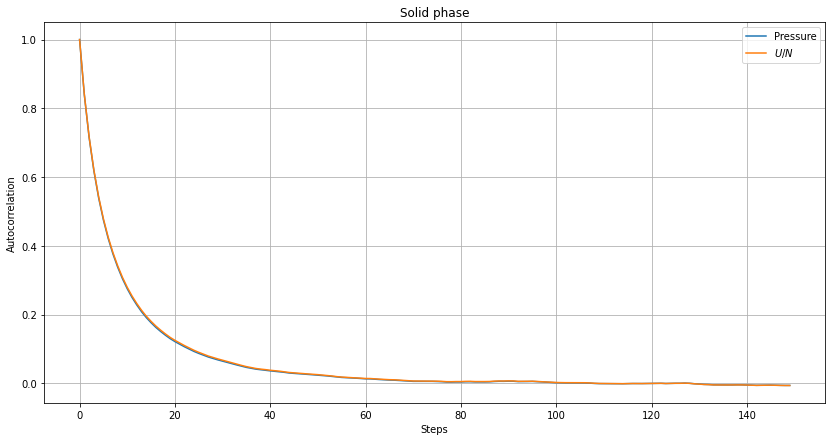

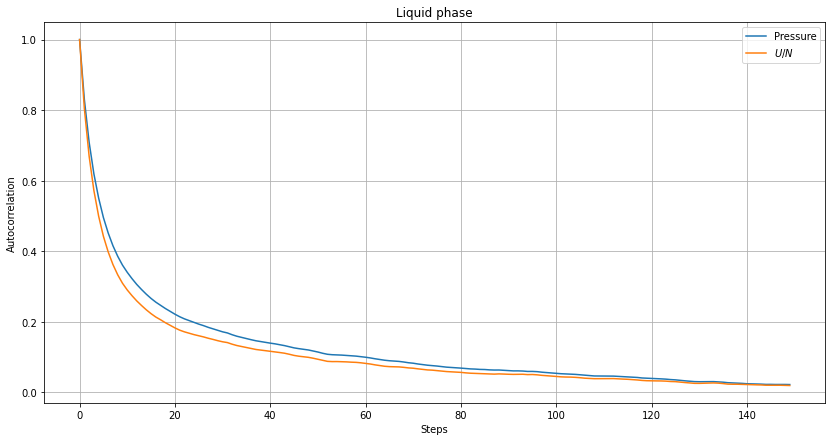

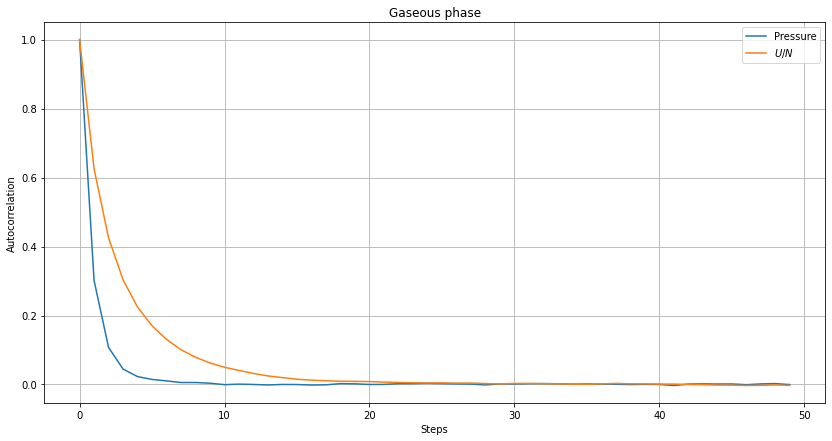

In [42]:
# Print correlation times
corr_pres_sol = [autocorrelation(y_pres_sol, t) for t in np.arange(150)]
corr_epot_sol = [autocorrelation(y_epot_sol, t) for t in np.arange(150)]

corr_lenght_pres_sol, var_pres_sol = optimize.curve_fit(exp_fit, np.arange(150), corr_pres_sol)
corr_lenght_epot_sol, var_epot_sol = optimize.curve_fit(exp_fit, np.arange(150), corr_epot_sol)

print("Correlation time of pressure [solid phase]: ", corr_lenght_pres_sol[0])
print("Correlation time of U/N [solid phase]: ", corr_lenght_epot_sol[0])
print()

corr_pres_liq = [autocorrelation(y_pres_liq, t) for t in np.arange(150)]
corr_epot_liq = [autocorrelation(y_epot_liq, t) for t in np.arange(150)]

corr_lenght_pres_liq, var_pres_liq = optimize.curve_fit(exp_fit, np.arange(150), corr_pres_liq)
corr_lenght_epot_liq, var_epot_liq = optimize.curve_fit(exp_fit, np.arange(150), corr_epot_liq)

print("Correlation time of pressure [liquid phase]: ", corr_lenght_pres_liq[0])
print("Correlation time of U/N [liquid phase]: ", corr_lenght_epot_liq[0])
print()

corr_pres_gas = [autocorrelation(y_pres_gas, t) for t in np.arange(50)]
corr_epot_gas = [autocorrelation(y_epot_gas, t) for t in np.arange(50)]

corr_lenght_pres_gas, var_pres_gas = optimize.curve_fit(exp_fit, np.arange(50), corr_pres_gas)
corr_lenght_epot_gas, var_epot_gas = optimize.curve_fit(exp_fit, np.arange(50), corr_epot_gas)

print("Correlation time of pressure [gaseous phase]: ", corr_lenght_pres_gas[0])
print("Correlation time of U/N [gaseous phase]: ", corr_lenght_epot_gas[0])

# Plot autocorrelation as a function of steps
plt.figure(1, figsize = (14, 7))
plt.plot(corr_pres_sol, label="Pressure")
plt.plot(corr_epot_sol, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
plt.plot(corr_pres_liq, label="Pressure")
plt.plot(corr_epot_liq, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

plt.figure(3, figsize = (14, 7))
plt.plot(corr_pres_gas, label="Pressure")
plt.plot(corr_epot_gas, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

plt.show()

From the computed correlation times we can affirm that if we want a resonable amount of indipendent measure of the observables of interest (say twenty measures) in each block, we'll have to run $N_{MC steps} = 20*2*t_{corr}$ Monte Carlo steps.
So in my case:

In [43]:
print("Monte Carlo steps - Pressure [solid phase] = ", 20*2*corr_lenght_pres_sol[0])
print("Monte Carlo steps - E pot [solid phase] = ", 20*2*corr_lenght_epot_sol[0])
print()
print("Monte Carlo steps - Pressure [liquid phase] = ", 20*2*corr_lenght_pres_liq[0])
print("Monte Carlo steps - E pot [liquid phase] = ", 20*2*corr_lenght_epot_liq[0])
print()
print("Monte Carlo steps - Pressure [gaseous phase] = ", 20*2*corr_lenght_pres_gas[0])
print("Monte Carlo steps - E pot [gaseous phase] = ", 20*2*corr_lenght_epot_gas[0])

Monte Carlo steps - Pressure [solid phase] =  321.33733415040865
Monte Carlo steps - E pot [solid phase] =  326.5316084807742

Monte Carlo steps - Pressure [liquid phase] =  499.0266993437625
Monte Carlo steps - E pot [liquid phase] =  387.2183263541948

Monte Carlo steps - Pressure [gaseous phase] =  34.48594325175439
Monte Carlo steps - E pot [gaseous phase] =  104.91124780426222


#### Statistical uncertanities as a function of blocks dimension

I than used the same data to study, with another python script, the estimation of the statistical uncertainties for the above quantitities for different size of the blocks in the data blocking technique.
I produced pictures of these statistical uncertainties as a function of the block size $L=M/N$ in the range $\left[10;5\times 10^3\right]$, being $N$ the number of blocks.
Pictures of these statistical uncertainties as a function of $L$ are shown below.

In [44]:
def get_error(x, blk_len):
    mc_step=len(x)
    n_blks=int(mc_step/blk_len)
    glob_avg=0
    glob_avg2=0

    for i in range(n_blks):
        blk_avg=0
        for j in range(blk_len):
            blk_avg += x[j+blk_len*i]
        blk_avg /= blk_len

        glob_avg += blk_avg
        glob_avg2 += (blk_avg*blk_avg)

    return np.sqrt((glob_avg2/n_blks-(glob_avg/n_blks)**2)/n_blks)

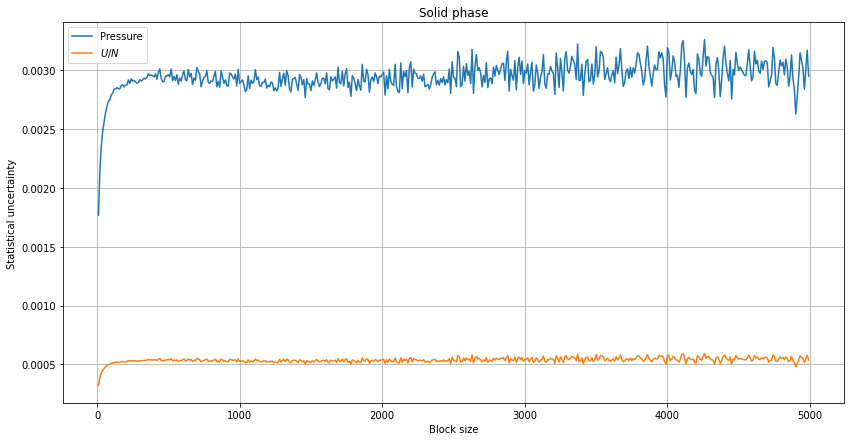

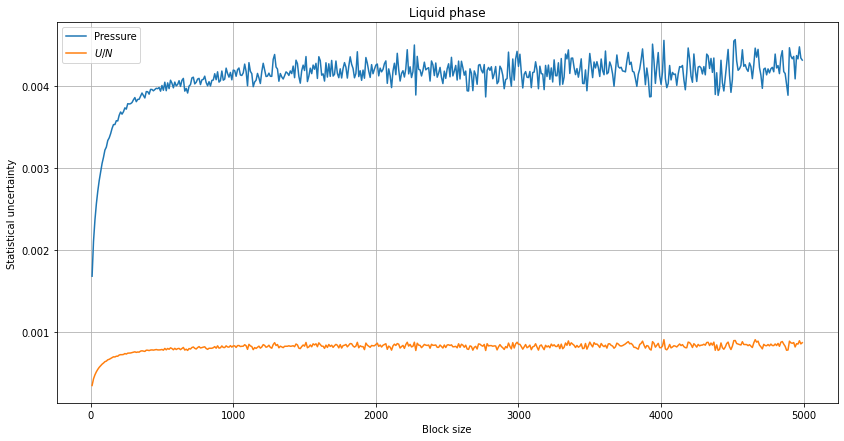

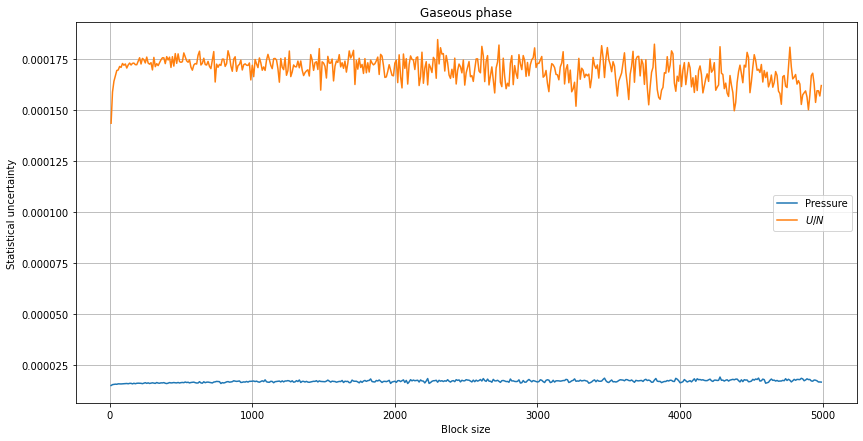

In [45]:
# Solid phase
plt.figure(1, figsize = (14, 7))
vec_pres_sol=[]
vec_epot_sol=[]

for blk_len in range(10, 5000, 10):
    err_pres_sol = get_error(y_pres_sol, blk_len)
    err_epot_sol = get_error(y_epot_sol, blk_len)

    vec_pres_sol.append(err_pres_sol)
    vec_epot_sol.append(err_epot_sol)

plt.plot(range(10, 5000, 10), vec_pres_sol, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_sol, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

# Liquid phase
plt.figure(2, figsize = (14, 7))
vec_pres_liq=[]
vec_epot_liq=[]

for blk_len in range(10, 5000, 10):
    err_pres_liq = get_error(y_pres_liq, blk_len)
    err_epot_liq = get_error(y_epot_liq, blk_len)

    vec_pres_liq.append(err_pres_liq)
    vec_epot_liq.append(err_epot_liq)

plt.plot(range(10, 5000, 10), vec_pres_liq, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_liq, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

# Gaseous phase
plt.figure(3, figsize = (14, 7))
vec_pres_gas=[]
vec_epot_gas=[]

for blk_len in range(10, 5000, 10):
    err_pres_gas = get_error(y_pres_gas, blk_len)
    err_epot_gas = get_error(y_epot_gas, blk_len)

    vec_pres_gas.append(err_pres_gas)
    vec_epot_gas.append(err_epot_gas)

plt.plot(range(10, 5000, 10), vec_pres_gas, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_gas, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

plt.show()

In all the cases I observe a fast grow to a stationary value of the statistical uncertanity.
So if we use too small blocks we understimate the value of the statistical uncertanity.
After a certain size, increasing the blocks cause, not only none benefit (the value of the error remain the same), but also a less stable statistical uncertanity due to the fact that we'll have less and less blocks to use for calculating it.

### Exercise 07.4

After having added the calculation of the radial distribution function $g(r)$ inside the Monte Carlo code, I performed simulations of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the solid, liquid and gas phase.
Below are shown the pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units.

The radial distribution functions obtained here are compared with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions [see `NSL-04/`].

In [14]:
# SI conversion
k_b=1.380649e-23
a_m_u=1.66054e-27

sigma_ar=0.34e-9
epsilon_ar=120.*k_b
m_ar=39.948*a_m_u

delta=0.0005

time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)

#### Solid phase

Parameters for the simulation of the solid phase are:
- $108$ particles;
- $500$ steps of equilibration;
- $100$ blocks;
- $600$ steps per block;
- $0.12$ of MC step (chosen in order to obtain 50% of acceptance);
- $\rho^\star = 1.1$;
- $T^\star = 0.8$;
- $r_c = 2.2$.

Using $600$ steps per block is almost guaranteed (from the upper study) that the right value of the statistical uncertainty is reached and that I'll have circa $40$ independent measures, both for pressure and potential energy.

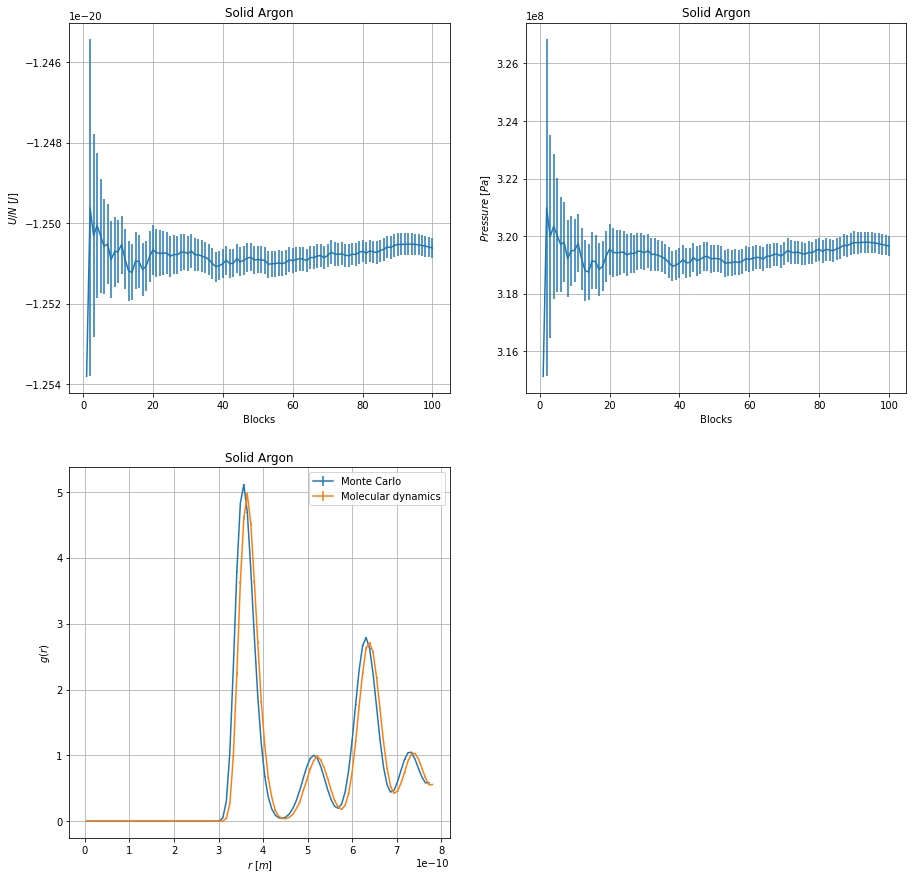

In [36]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("../results/solid/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("../results/solid/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("../results/solid/output.gave.0", unpack = True, usecols = (1,2,3))
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("../../NSL-04/results/solid/ave_g.out", unpack = True)

# Change units
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

# Plot graphs
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)

plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(2, 2, 2)

plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(2, 2, 3)

plt.title("Solid Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar[:-1], y_s_gave_mc[:-1], yerr_s_gave_mc[:-1], label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.show()

#### Liquid phase

For the the simulation of the liquid phase I kept the same parameters chosen for the solid simulation except for the following:

- $1000$ steps per block;
- $\rho^\star = 0.8$;
- $T^\star = 1.1$;
- $r_c = 2.5$.

Using $1000$ steps per block is almost guaranteed (from the upper study) that the right value of the statistical uncertainty is reached and that I'll have circa $40$ independent measures, both for pressure and potential energy.

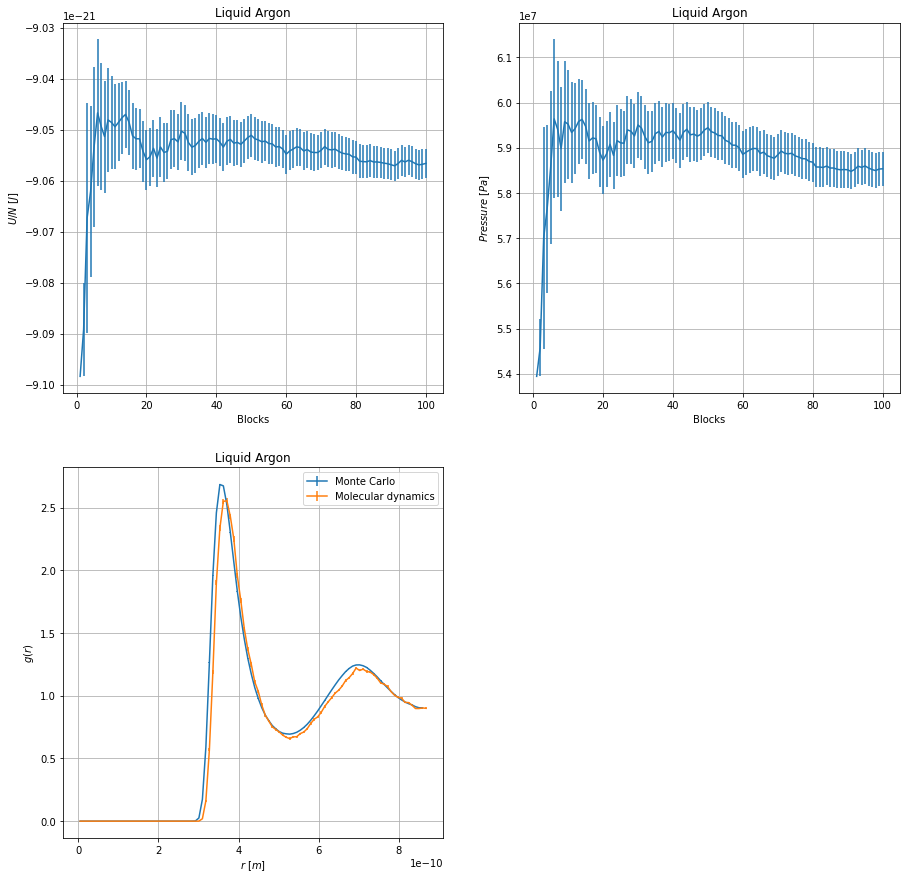

In [37]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("../results/liquid/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("../results/liquid/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("../results/liquid/output.gave.0", unpack = True, usecols = (1,2,3))
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("../../NSL-04/results/liquid/ave_g.out", unpack = True)

# Change units
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

# Plot graphs
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)

plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(2, 2, 2)

plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(2, 2, 3)

plt.title("Liquid Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar[:-1], y_s_gave_mc[:-1], yerr_s_gave_mc[:-1], label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.show()

#### Gaseous phase 

Modified parameters are:

- $200$ steps per block;
- $5.5$ of MC step (chosen in order to obtain 50% of acceptance);
- $\rho^\star = 0.05$;
- $T^\star = 1.2$;
- $r_c = 5.0$.

Using $200$ steps per block is almost guaranteed (from the upper study) that the right value of the statistical uncertainty is reached and that I'll have circa $40$ independent measures, both for pressure and potential energy.

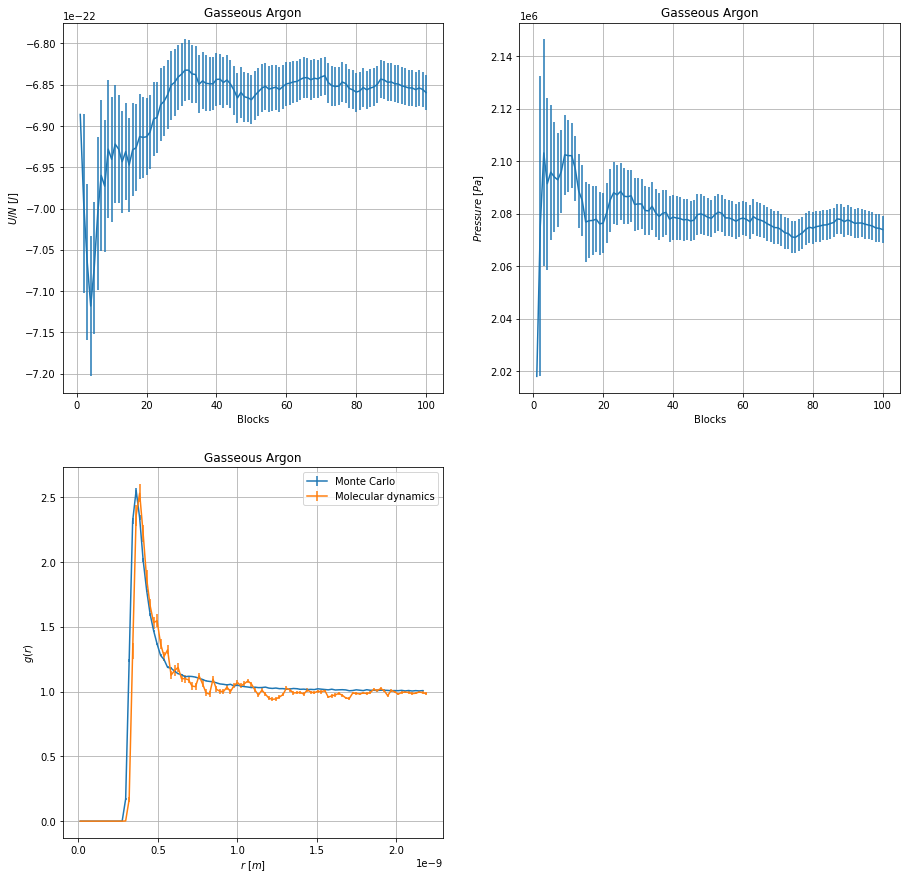

In [40]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("../results/gas/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("../results/gas/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("../results/gas/output.gave.0", unpack = True, usecols = (1,2,3))
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("../../NSL-04/results/gas/ave_g.out", unpack = True)

# Change units
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

# Plot graphs
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)

plt.title("Gasseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(2, 2, 2)

plt.title("Gasseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(2, 2, 3)

plt.title("Gasseous Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar[:-1], y_s_gave_mc[:-1], yerr_s_gave_mc[:-1], label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.show()

Results of $U/N$ and pressure $P$ computed here are compatible with those obtained with MD simulations.
The comparison of radial distribution functions $g(r)$ shows a good matching between the results of the two different sampling methods.